# Fractional Brownian Motion Expectations
Here the first and second order expectaions of fractional brownian motion are discussed. <br>
Let $Z_t^H$ denote a fractional brownian motion path with paramter $H$ as a function of time. Then moments are given by,<br>

$
\begin{align}
&\text{E}[Z^H_t] = 0 \\
&\text{E}[(Z_t^H)^2] = t^{2H} \\
&\text{E}[Z^H_t Z^H_s] = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}],
\end{align}
$

where $t > s$.

Let $\Delta Z^H_t$ denote an increment of fractional brownina motion, then the autocovariance of increments seperated in time by $n$ is given by,<br>

$
\begin{align}
E[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

### Limits of Second Moments
The Qualitative behavior of fractional brownian motions has three different regimes</br> 
as a function of H, </br>

$
\begin{align}
1.&\hspace{3mm} 0 < H < \frac{1}{2} \\
2.&\hspace{3mm} H=\frac{1}{2} \\
3.&\hspace{3mm} \frac{1}{2} < H < 1
\end{align}
$

Also, the limit $t \gg 1$ will be considered

#### $H \rightarrow 0$

$
\begin{align}
\lim_{H \to 0}&\hspace{1mm} \text{E}[(Z_t^H)^2] = 1 \\
\lim_{H \to 0}&\hspace{1mm} \text{E}[Z^H_t Z^H_s] = \frac{1}{2} \\
\lim_{H\to 0}&\hspace{1mm} \text{E}[\Delta Z^H_t \Delta Z^H_{t+n}] = 0
\end{align}
$

#### $H \rightarrow \frac{1}{2}$

$
\begin{align}
\lim_{H \to \frac{1}{2}}&\hspace{1mm} \text{E}[(Z_t^H)^2] = t \\
\lim_{H \to \frac{1}{2}}&\hspace{1mm} \text{E}[Z^H_t Z^H_s] = s \\
\lim_{H\to \frac{1}{2}}&\hspace{1mm} \text{E}[\Delta Z^H_t \Delta Z^H_{t+n}] = 0
\end{align}
$

#### $H \rightarrow 1$

$
\begin{align}
\lim_{H \to 1}&\hspace{1mm} \text{E}[(Z_t^H)^2] = t^2 \\
\lim_{H \to 1}&\hspace{1mm} \text{E}[Z^H_t Z^H_s] = ts \\
\lim_{H \to 1}&\hspace{1mm} \text{E}[\Delta Z^H_t \Delta Z^H_{t+n}] = \Delta t^2
\end{align}
$

#### $t \gg 1$

$
\begin{align}
&\text{E}[(Z_t^H)^2] = t^{2H} \\
&\text{E}[Z^H_t Z^H_s] \approx \frac{1}{2}\left( s^{2H} + 2Hst^{2H-1} \right) \\
&\text{E}[\Delta Z^H_t \Delta Z^H_{t+n}] \approx \Delta t^{2H}H(2H-1)^{2H-2}
\end{align}
$


## Imports

In [73]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import config

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Plots

In [74]:
def covariance_plot(H_vals, s, time, lengend_location):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$\sigma_{ts}^H$")
    axis.set_xlim([0.0, time[-1]])
    axis.set_title(r"Fraction Brownian Motion Covariance, $\frac{1}{2}[t^{2H} + s^{2H} - \mid t-s \mid^{2H}]$" + f", s={format(s, '1.2f')}")
    time_plot = time[numpy.where(time > s)]
    for H in H_vals:
        axis.plot(time_plot, fbm.cov(H, s, time_plot), label=f"H={format(H, '1.2f')}")
    axis.legend(ncol=2, bbox_to_anchor=lengend_location)

def autocorrelation_plot(H_vals, time, lengend_location):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    axis.set_xlabel(r"$n$")
    axis.set_ylabel(r"$\gamma_{n}^{H}$")
    axis.set_title(r"Fraction Brownian Motion Increment Autocovariance, $r^{H}_{n}=\frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$")
    for H in H_vals:
        axis.plot(time, fbm.autocorrelation(H, time), label=f"H={format(H, '1.2f')}")
    axis.legend(ncol=2, bbox_to_anchor=lengend_location)

def variance_plot(H_vals, time, lengend_location):
    figure, axis = pyplot.subplots(figsize=(15, 12))
    axis.set_xlabel("Time")
    axis.set_ylabel(r"$\sigma_t^H$")
    axis.set_title(r"Fraction Brownian Motion Variance, $t^{2H}$")
    for H in H_vals:
        axis.plot(time, fbm.var(H, time), label=f"H={format(H, '1.2f')}")
    axis.legend(ncol=2, bbox_to_anchor=lengend_location)

## $E[(Z_t^H)^2] = t^{2H}$

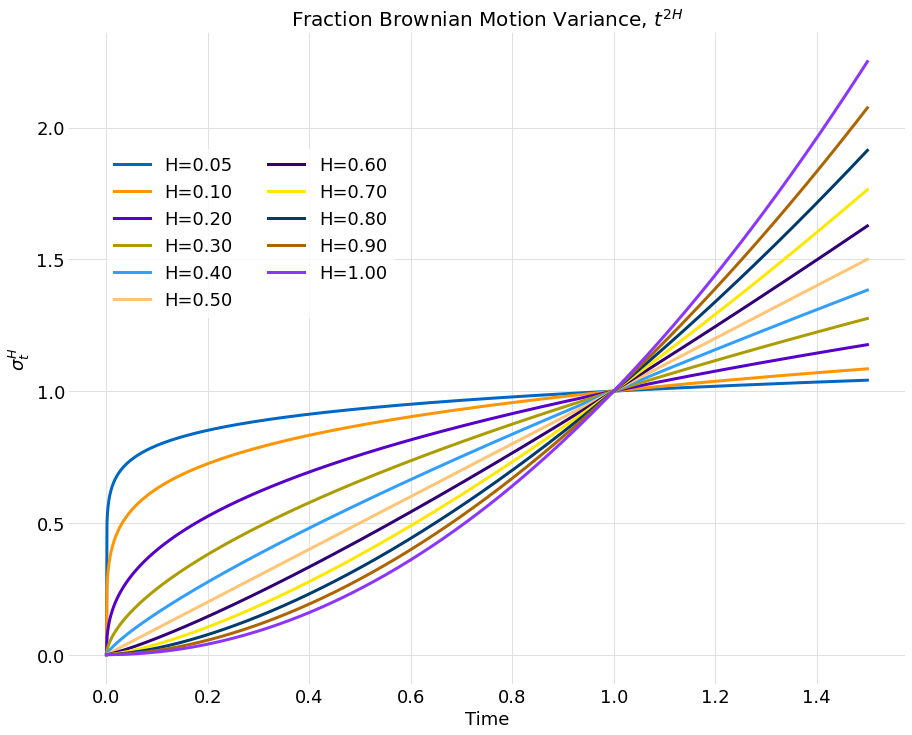

In [75]:
tmax = 1.5
Δt = 0.001
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
time = numpy.linspace(0.0, tmax, nsteps)

variance_plot(H_vals, time, (0.4, 0.55))

## $E[Z^H_t Z^H_s] = \frac{1}{2}[t^{2H}+s^{2H}-(t-s)^{2H}]$

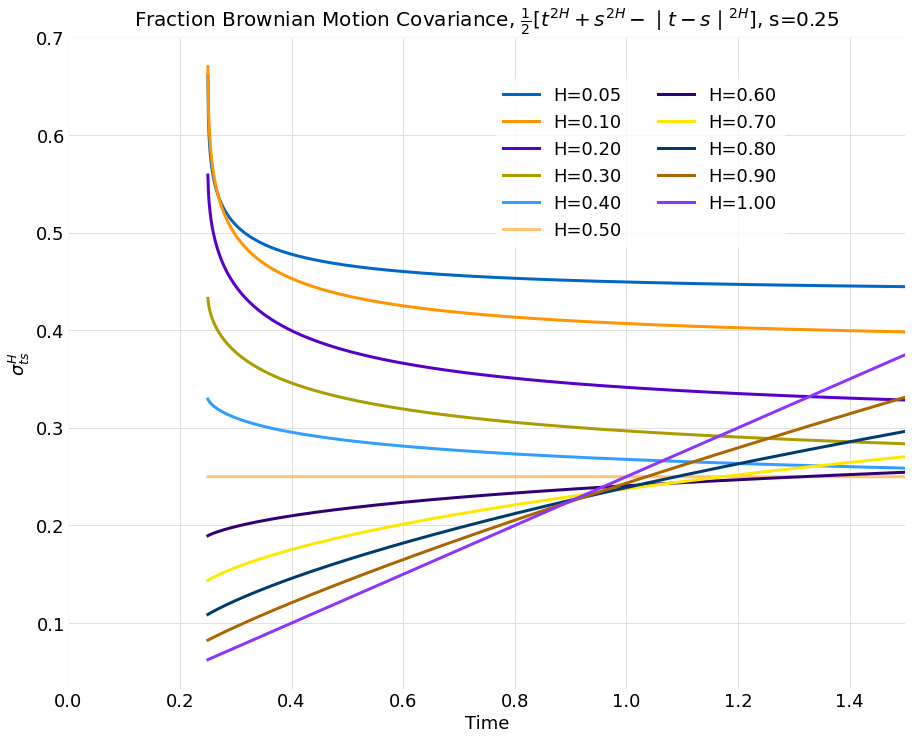

In [76]:
tmax = 1.5
Δt = 0.001
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
time = numpy.linspace(0.0, tmax, nsteps)

s = 0.25
covariance_plot(H_vals, s, time, (0.5, 0.665))

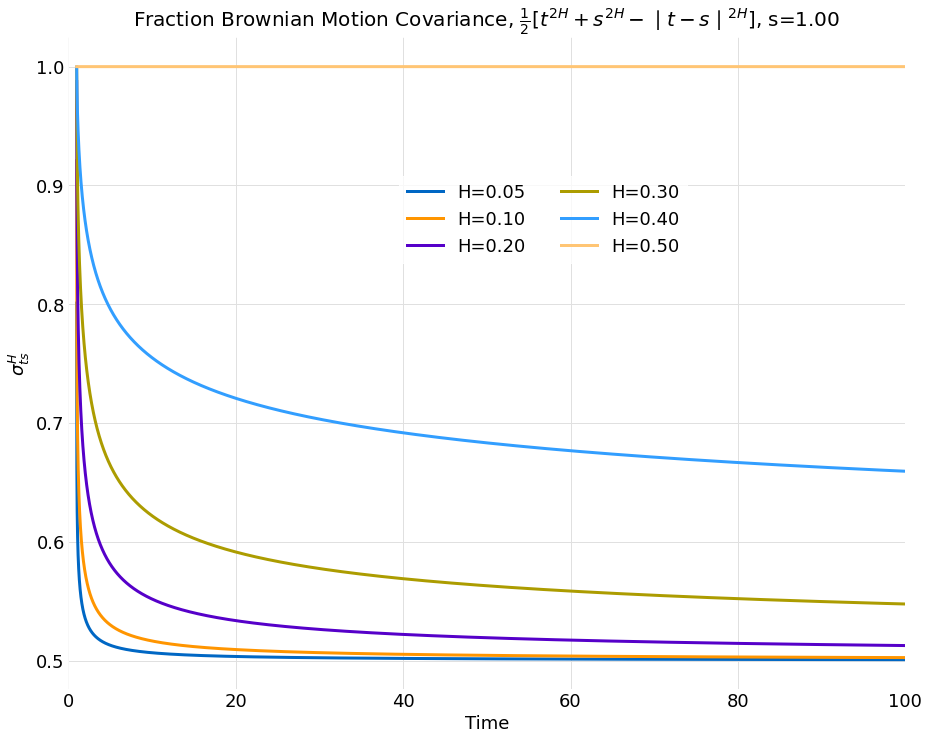

In [77]:
tmax = 100
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
time = numpy.linspace(0.0, tmax, nsteps)

s = 1.0
covariance_plot(H_vals, s, time, (0.75, 0.8))

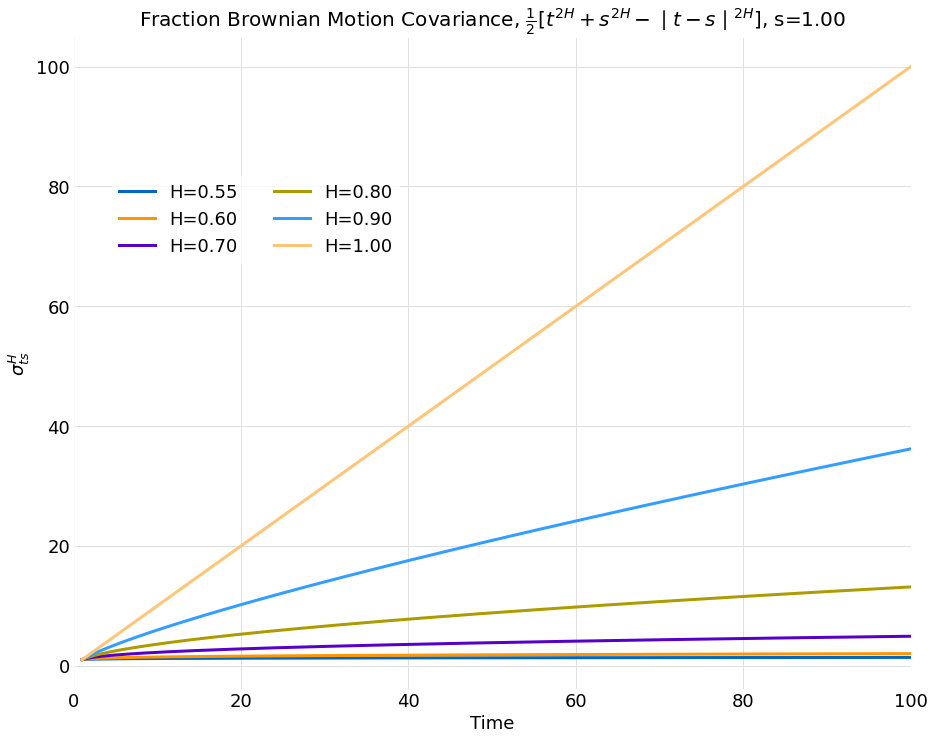

In [78]:
tmax = 100
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.55, 0.6, 0.7, 0.8, 0.9, 1.0]
time = numpy.linspace(0.0, tmax, nsteps)

s = 1.0
covariance_plot(H_vals, s, time, (0.4, 0.8))

## $E[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]$

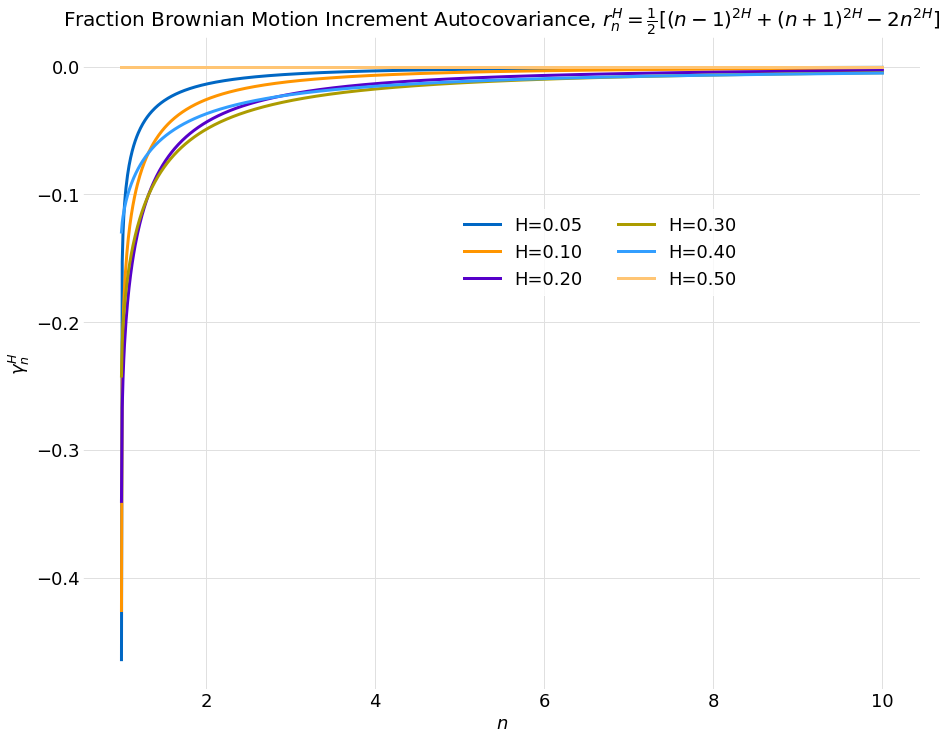

In [79]:
tmax = 10.0
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
time = numpy.linspace(1.0, tmax, nsteps)

autocorrelation_plot(H_vals, time, (0.8, 0.75))

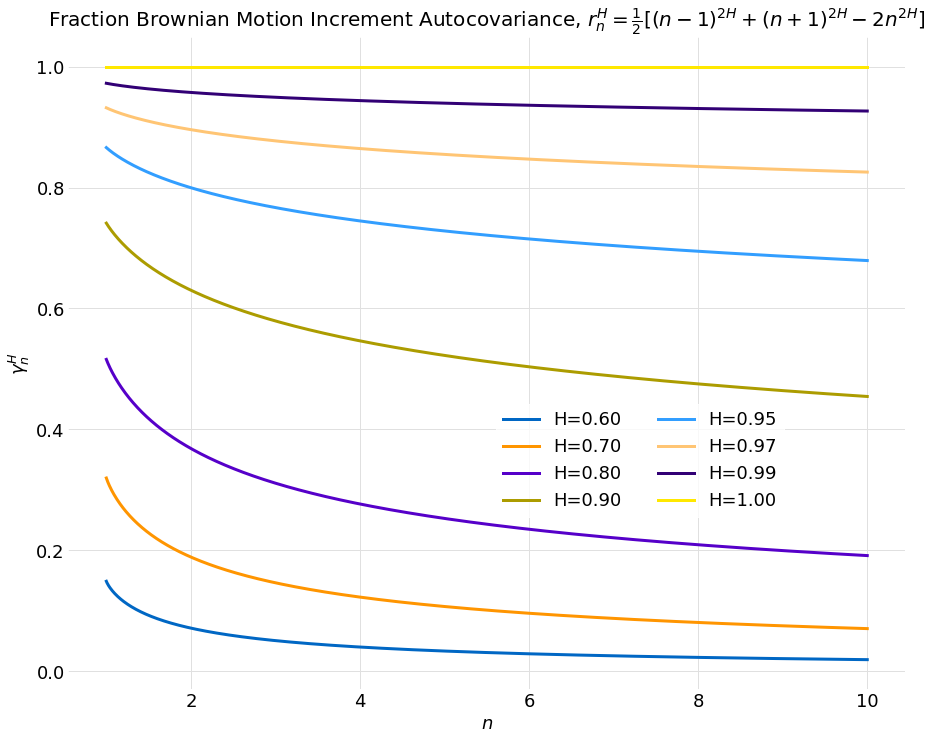

In [80]:
tmax = 10.0
Δt = 0.01
nsteps = int(tmax/Δt)
H_vals = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
time = numpy.linspace(1.0, tmax, nsteps)

autocorrelation_plot(H_vals, time, (0.5, 0.25))

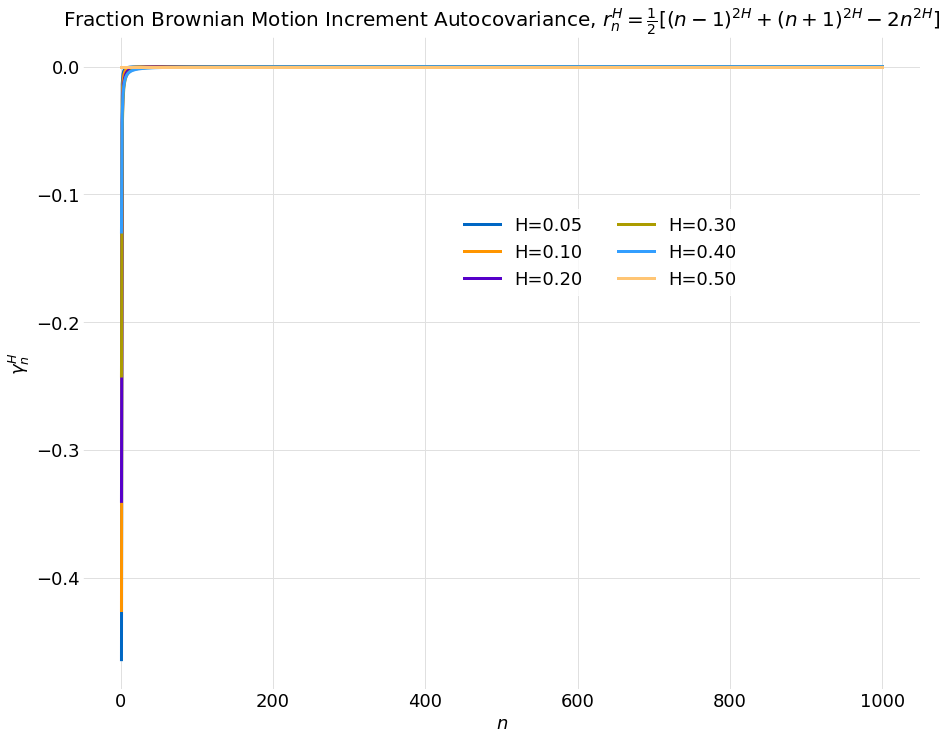

In [81]:
tmax = 1000.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
time = numpy.linspace(1.0, tmax, nsteps)

autocorrelation_plot(H_vals, time, (0.8, 0.75))

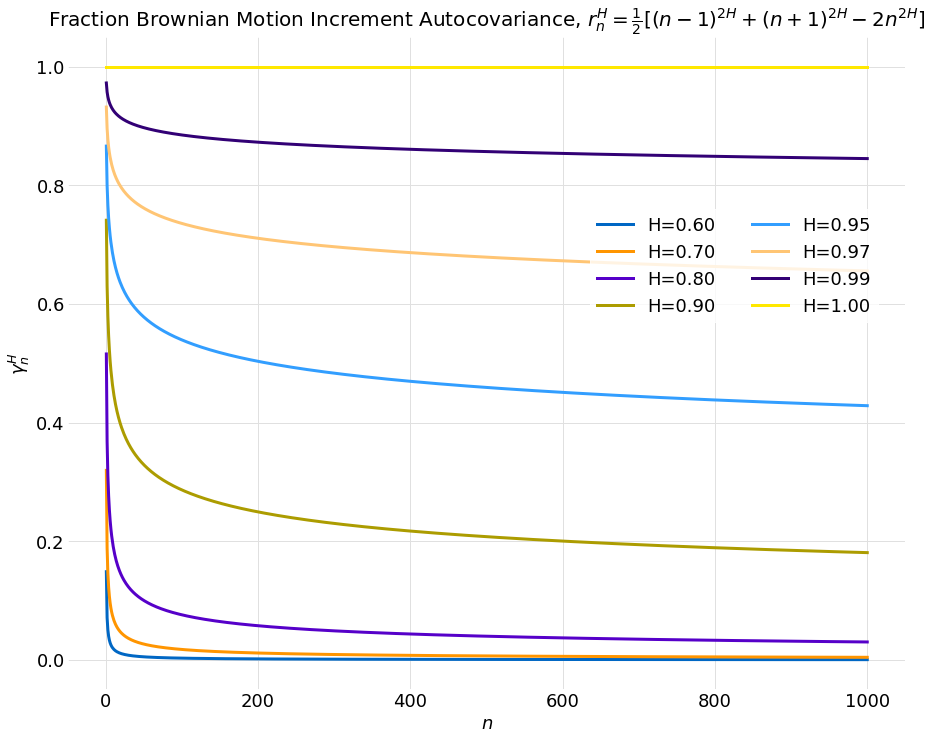

In [82]:
tmax = 1000.0
Δt = 1.0
nsteps = int(tmax/Δt)
H_vals = [0.6, 0.7, 0.8, 0.9, 0.95, 0.975, 0.99, 1.0]
time = numpy.linspace(1.0, tmax, nsteps)

autocorrelation_plot(H_vals, time, (0.6125, 0.75))